# Chapter 2 Random Variables Part II

#### *Zhuo Jianchao* 

Feb 12, 2020 *Rev 1*

## Distribution Function

Distribution of probability is done by probability function, which assigns real-valued likelihood to an event.

For sample space with seperate outcomes, distribution is straightforward and easy for comprehension.

### Example 4.1

When a mosquito flies around a crowd of people, it decides which one to bite. Evidence shows that a mosquito chooses a type-O blood with likelihood of $\frac{4}{12}$, a type-A blood $\frac{2}{12}$, and type-B, type-AB with the same $\frac{3}{12}^{*}$ likelihood(* *all made-up figures*). In this random experiment, a mosquito chooses one random person with some specific blood type. The sample space is $S=\{O,A,B,AB\}$, with probability assigned to each of the basic outcomes, which is the **distribution of probability**, which can be illustrated by the following bar chart.

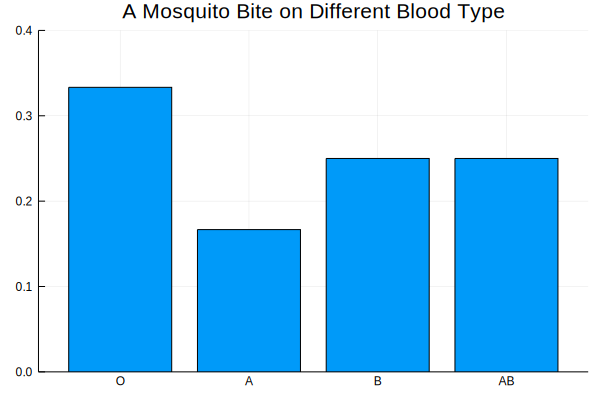

In [1]:
using Plots

prob = [4/12,2/12,3/12,3/12]
blood_type = ["O","A","B","AB"]
bar(blood_type, prob, ylim=(0,0.4), legend=false)
title!("A Mosquito Bite on Different Blood Type")

The mosquito chooses only one person to bite, but there are four possible different outcomes. An outcome is more likely to happen if it has a higer probability assigned to it, hence a taller bar.

The probability of each basic outcome is
$$
P(O)=\frac{4}{12}\\
P(A)=\frac{2}{12}\\
P(B)=\frac{3}{12}\\
P(B)=\frac{3}{12}
$$

Now we define a random variable $X$ to transform the original sample space into sample space in $\mathbb{R}$ by the following rules,
$$
X(O)=1\\
X(A)=2\\
X(B)=3\\
X(AB)=4
$$

By this transformation, the sample space is now mapped into the real line, hence the probability distribution in the bar chart becomes 

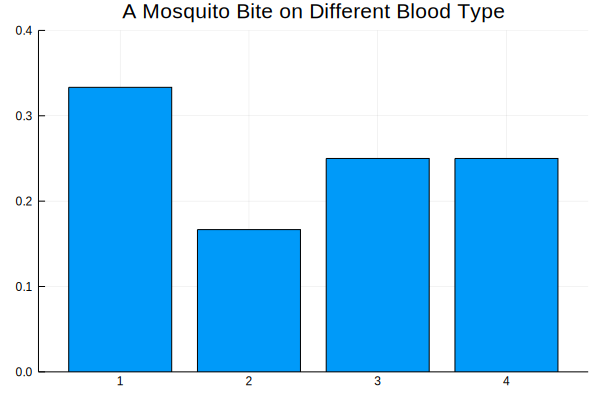

In [2]:
prob = [4/12,2/12,3/12,3/12]
blood_type = [1,2,3,4]
bar(blood_type, prob, ylim=(0,0.4), legend=false)
title!("A Mosquito Bite on Different Blood Type")

**Notice** the sample space doesn't have to contain only countable elements, it can be a range in the real line. In this case, only consider probability distributed among basic outcomes is not enough.

### Example 4.2
Recall the example of the MOBA game, where neither side can be defeated during the first 6 minutes in a round and the game is forced into a tie when it reaches 60 minutes. For a round of the game, the duration time *t* can take arbitrary real number between 6 and 60 in minutes. Then the sample space is 
$$S=\{t\in\mathbb{R}: 6\leq t \leq 60\}$$

We can construct a random variable $T$ to be the duration of a gameplay, since the original sample space is already a set on the real line, this transformation has naturally formed.

Here comes the question, how can we assign probability to the sample space? Let's say, what is the probability for a round of game to last exactly 45 minutes? or what is $P(T=t)$, where t=45, or simply $P(T=45)$?
> Since $t$ can take on arbitrary real number between 6 and 60, $t=45$ is only one single point in infinitely many points which combined form the range from 6 to 60. Then the probability assigned to it must correspondingly decrease to be infinitely small because probability distributed among all possible outcomes should sum to 1.

The basic outcome that a game lasts exactly 45 minutes is possible to happen but with no exact probability assigned to it, that is to say, the outcome is **not measurable**, so as other infinitely many single possible outcomes.

Another question, what is the probability of the event that a round lasts more that 20 minutes but not more than 40 minutes? That's equivalent to ask the probability of the event that $20 < T \leq 40$. If the probability is evenly distributed between 6 and 60, then this question can be answered by calculating the ratio between *measure* of events and *measure* of the sample space.

$$P(20< T \leq 40)=\frac{\text{length of the event set}}{\text{length of the sample space}}=\frac{40-20}{60-6}=\frac{20}{54}$$

This event can be measured, so as other events with legitimate length. Events, which may be unions of infinitely many possible outcomes are measurable. That's the reason why probability function assigns probability to events in the $\sigma$-algebra instead of basic outcomes in the sample space.

An event with legitimate length is always measurable so we can calculate the probability of a measurable event. However, with different distributions among the real line, the probability assigned to an event can be different. For examples, 
$$P(20< T \leq 40)=\frac{20}{54}\\
P(20< T \leq 60)=\frac{40}{54}
$$
we know exactly as the event becomes "lengthier", the probability assigned to it will become larger, but what's the pattern of probability growth as event lengthens? So far, probability function of a random variable is defined on every single event, how can we describe the probability function on a more comprehensive perspective? 

Here comes cumulative distribution function from which we'll discuss characteristic of random variable, whose range will always be on the real line.

### Definition 4 Cumulative Distribution Function

A plausible method to examine the relationship between probability growth and event lengthening is in each step to lengthen an event a little bit and record the corresponding probability. Take some improvements to make it more analytically available, we have a formal method.

The **cumulative distribution function** of a random variable $X$ is defined as $F_{X}(x)$, where
$$F_{X}(x)=P(X \leq x) \text{ for all } x \in \mathbb{R}$$

### Extended Example 4.2

Let's get our hands dirty to analyse the probability function on the example 4.2. The range of the random variable $T$ is $[6,60]$. We first examine two thresholds which are the lowest and largest values the random variable can choose.

1. take any $x \in (-\infty ,6)$, let's say, $x=5$, then $F_{X}(x=5)=P(X \leq 5)=0$ because the range of $X$ will always be greater than 6, it's impossilbe for it to be less than or equal to 5, same reason to any real value less than 6, the lowest value $X$ can take on. Therefore, $$F_{X}(x)=P(X \leq x)=0 \text{ for all } x \in (-\infty ,6)$$
2. how about the value greater than or equal to 60, the maximum of $X$, $$F_{X}(x)=P(X \leq x)=1 \text{ for all } x \in [60 ,+\infty)$$because $X$ will never exceed 60, then the event for $X$ to be smaller than some number larger or equal to 60 is a certain event, hence has probability of one.
3. if $x \in [6,60)$, any slight change of $X$ will make a difference. By the definition
$$F_{X}(x)=P(X \leq x)=\frac{\text{length of [6,x)}}{\text{length of the sample space}}=\frac{x-6}{54}$$
the second equal sign can hold is because the probability is **evenly spread** in the sample space, then we can use ratio of lengths to represent probability.


combine these three equations, we have the cumulative distribution function, or CDF for short, of the random variable $X$,
$$
F_{X}(x)=\begin{cases}
0, & x \in (-\infty, 6) \\
\frac{x-6}{54}, & x \in [6,60) \\
1, & x \in [60 ,+\infty)
\end{cases}
$$

Use graph to illustrate how probability changes due to change in $x$.

In [3]:
# Initialize a CDF, which is essentially a piece-wise function.

function cdf(x)
    x < 6 && return 0
    x >= 60 && return 1
    if 6 <= x < 60 
        return (x-6)/54
    end
end

cdf (generic function with 1 method)

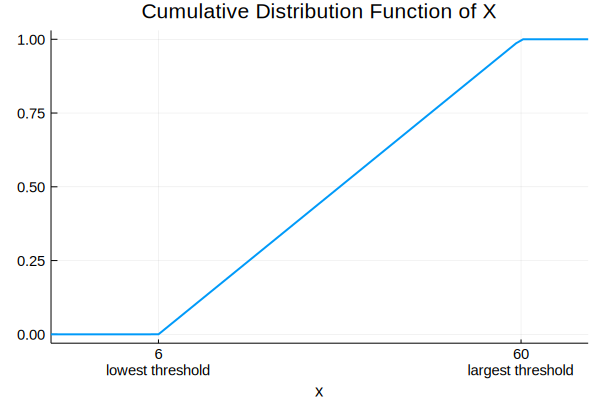

In [4]:
plot(cdf, xlim=(-10,70), lw=2, legend=false, 
    xticks=([6,60],["6 \n lowest threshold","60 \n largest threshold"]), xlabel="x",
    xtickfont =font(10), ytickfont=font(10))
title!("Cumulative Distribution Function of X")

Notice the range where x is between 6 and 60, the function is a straight line, which indicates the fact that the function is evenly spread among sample space. Probability increases proportionally to increase of $x$. When the CDF of $X$ represents such characteristics, the $X$ is said to follow a **uniform distribution**, which we'll discuss in later chapter.

### Properties of CDF

Suppose that $F_X{x}$ is the cumulative distribution function of $X$, then
1. $\lim_{x \rightarrow -\infty}F_{X}(x)=0$ and $\lim_{x \rightarrow +\infty}F_{X}(x)=1$
2. $F_{X}(x)$ is non-decreasing, which means that for any $x_1 < x_2, F_{X}(x_1) \leq F_{X}(x_2)$
3. $F_{X}(x)$ is right-continuous, i.e., for all $x$ and $\delta >0,$
$$\lim _{\delta \rightarrow 0^{+}}\left[F_{X}(x+\delta)-F_{X}(x)\right]=0$$

Some explanations of these three properties.
1. The definition of CDF is actually a probability value of some events. Since probability function $P$ is a mapping from an event to a real-numbered value in $[0,1]$, then CDF is also a mapping to it;
2. Since CDF is essentially the probability on some events whose length is larger as x becomes larger at lease won't decrease, hence the probability is non-decreasing with respect to x;
3. Combine 1 and 2 into consideration, CDF is always a non-decreasing function from 0 to 1. Therefore, its value at negative infinite is 0, and 1 at positive infinite.
4. Whether CDF is left-continuous or right-continuous is a matter of convention. CDF is only required to be partially continuous because for some random variable whose values are countable but infinitely many numbers in the real line, for example, natural numbers, the probability for it to take on a single number is measurable, i.e., $P(X=a)>0$, in this case, CDF is not continuous but partially continuous. This problem automatically ceases when $X$ can take on arbitrary numbers in the real line. The difference between this two cases is the same difference between a discrete random variable and a continuous random variable, which we'll discuss later.

### Definition 5 Identical Distributions

Because CDF fully characterizes a random variable, two identical CDFs means two identical random variables.

Two random variable $X$ and $Y$ are identically distributed or follow identical distributions if
$$F_{X}(a)=F_{Y}(a) \text{ for all } a \in (-\infty,+\infty)$$